```yaml
    Course:   DS 5001,
    Author:   Raymundo Mora,
    Email:    rm3xw@virginia.edu
    Date:     Spring 2023
```

# Topic Modeling


## 0.0 Import Relevant Libraries

In [1]:
# the two must have libraries in any data science project 
import numpy as np
import pandas as pd

from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly_express as px


import sqlite3
import pandas as pd
import re


import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, HTML

## 0.1 Import data and Define Global Variables

In [2]:
# relative path to where data will be stored. 
data_dir = "datasets/"
# relative path to our visualization directory
vis_dir = "visualizations/"

#lexicons directory
lex_dir = "lexicons/"

OHCO = ['track.id','section_num','line_num','token_num'] # define our object heiarchy 


LINE = OHCO[:3]
SECTION = OHCO[:2]
SONG = OHCO[:1]
BAG = SONG

## 0.2 Load in Relevant DataFrames

In [3]:
LIB_english = pd.read_csv(data_dir+'LIB_english.csv')
TOKENS = pd.read_csv(data_dir+'F2_TOKENS_english.csv').set_index(OHCO)


In [4]:
LIB_english

,added_at,track.album.album_group,track.album.album_type,track.album.artists,track.album.available_markets,track.album.external_urls.spotify,track.album.href,track.album.id,track.album.images,track.album.is_playable,...,track.preview_url,track.track_number,track.type,track.uri,genre,artist,song,language,language_name,top_genre
0,2023-04-11T15:06:37Z,album,album,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://open.spotify.com/album/6tG8sCK4htJOLjl...,https://api.spotify.com/v1/albums/6tG8sCK4htJO...,6tG8sCK4htJOLjlWwb7gZB,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",True,...,https://p.scdn.co/mp3-preview/41728b2155b6603b...,1,track,spotify:track:7HdXRMw14roDx2a0COWk3M,"['candy pop', 'modern rock', 'pixie', 'pop', '...",Paramore,This Is Why,en,English,candy pop
1,2023-04-10T01:13:38Z,album,album,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://open.spotify.com/album/6kZ42qRrzov54Lc...,https://api.spotify.com/v1/albums/6kZ42qRrzov5...,6kZ42qRrzov54LcAk4onW9,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",True,...,https://p.scdn.co/mp3-preview/63cfaaef1a487995...,22,track,spotify:track:4OmFmE0fzcMG6g0Y8p4eSD,['pop'],Taylor Swift,Better Man (Taylor's Version) (From The Vault),en,English,pop
2,2023-04-09T07:18:17Z,single,single,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://open.spotify.com/album/2OZO8I4Z79M8VN2...,https://api.spotify.com/v1/albums/2OZO8I4Z79M8...,2OZO8I4Z79M8VN2H0wgjEp,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",True,...,https://p.scdn.co/mp3-preview/eaf69b89d382a2e1...,2,track,spotify:track:5ZjFa8NE9MHKBPNefxIh88,[],FYLOW,Give It To Me - Sped Up Version,en,English,NaN
3,2023-04-09T02:07:04Z,album,album,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://open.spotify.com/album/4aJQ9c9XNSJ9eiC...,https://api.spotify.com/v1/albums/4aJQ9c9XNSJ9...,4aJQ9c9XNSJ9eiCrmqH3S3,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",True,...,https://p.scdn.co/mp3-preview/81fa22cf7f759d9c...,24,track,spotify:track:171SFtWNviZ7Tp10zxNdpN,"['american folk revival', 'folk', 'protest fol...",Woody Guthrie,Union Maid,en,English,american folk revival
4,2023-04-04T23:47:45Z,album,album,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://open.spotify.com/album/1kTlYbs28MXw7hw...,https://api.spotify.com/v1/albums/1kTlYbs28MXw...,1kTlYbs28MXw7hwO0NLYif,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",True,...,https://p.scdn.co/mp3-preview/260584b4f44684fa...,17,track,spotify:track:0bCCMwWTaYOcQ4v8EeEYmd,"['detroit hip hop', 'hip hop', 'pop', 'rap']",Eminem,Crazy In Love,en,English,detroit hip hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,2016-05-24T09:41:01Z,compilation,compilation,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://open.spotify.com/album/5qENHeCSlwWpEzb...,https://api.spotify.com/v1/albums/5qENHeCSlwWp...,5qENHeCSlwWpEzb25peRmQ,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",True,...,https://p.scdn.co/mp3-preview/f943c5b5954918a2...,6,track,spotify:track:5Z01UMMf7V1o0MzF86s6WJ,"['detroit hip hop', 'hip hop', 'pop', 'rap']",Eminem,"Lose Yourself - From ""8 Mile"" Soundtrack",en,English,detroit hip hop
1443,2016-05-24T09:40:58Z,album,album,[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://open.spotify.com/album/2cWBwpqMsDJC1ZU...,https://api.spotify.com/v1/albums/2cWBwpqMsDJC...,2cWBwpqMsDJC1ZUwz813lo,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",True,...,https://p.scdn.co/mp3-preview/646f0a143151af01...,18,track,spotify:track:4xkOaSrkexMciUUogZKVTS,"['detroit hip hop', 'hip hop', 'pop', 'rap']",Eminem,Till I Collapse,en,English,de

In [5]:
TOKENS.head()

pos_tuple  pos  \
track.id               section_num line_num token_num                        
00Mb3DuaIH1kjrwOku9CGU 1           1        0           ('He', 'PRP')  PRP   
                                            1          ('was', 'VBD')  VBD   
                                            2             ('a', 'DT')   DT   
                                            3           ('boy', 'NN')   NN   
                                            4          ('she', 'PRP')  PRP   

                                                      token_str term_str  
track.id               section_num line_num token_num                     
00Mb3DuaIH1kjrwOku9CGU 1           1        0                He       he  
                                            1               was      was  
                                            2                 a        a  
                                            3               boy      boy  
                                            4               she      she

In [6]:
VOCAB = pd.read_csv(data_dir+'F3_top_artists_VOCAB_english.csv')
VOCAB

,term_str,n,p,i,n_chars,max_pos
0,the,33760,0.047721,4.389233,3,DT
1,to,22115,0.031260,4.999523,2,TO
2,of,20605,0.029126,5.101554,2,IN
3,i,15208,0.021497,5.539718,1,PRP
4,a,14451,0.020427,5.613379,1,DT
...,...,...,...,...,...,...
20552,tallahatchie,1,0.000001,19.432261,12,NNP
20553,apartchorus,1,0.000001,19.432261,11,JJ
20554,hammett,1,0.000001,19.432261,7,NNP
20555,kirk,1,0.000001,19.432261,4,NNP


In [7]:
df = pd.read_excel(lex_dir+'inquirerbasic.xls', false_values=None)
df.sample(10)

,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othtags,Defined
11585,WILL#1,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV VERB MOD PFREQ,| 98% verb: Modal indicating future
6055,LETTER#4,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,| 1% verb: To mark with letters
9252,SEVER,H4Lvd,NaN,Negativ,NaN,NaN,NaN,Hostile,NaN,NaN,...,NaN,NegAff,NaN,NaN,NaN,NaN,NaN,NaN,Modif,|
10592,TIME#5,H4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LY,| 1% idiom-adv: 'on time'--punctual
929,BANTER#1,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FormLw,Noun,|
6805,MUNICIPALITY,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|
4505,GENERAL#2,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TimeSpc,NaN,LY,"| 48% adv: ""Generally, in general""--as a rule,..."
6361,MANIPULATION,H4,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun Other,|
2646,DEBTOR,H4Lvd,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|
6606,MINE#1,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRON Singp,"| 60% pron: The absolute form of ""my"""


# Handle variant terms 

Split entries like `FASCINATE#1` and `FASCINATE#2` with `FASCINATE, 1` and `FASCINATE, 2` (so our data are atomic).

In [8]:
df['split'] = df.Entry.str.split(r'[#_]+')

In [9]:
# Function to add 1 to terms without variants
def add_1(x):
    try:
        if len(x) == 1:
            x = x + ['1']
    except:
        print(x)
        x = 0
    return x

In [10]:
df['split'] = df['split'].apply(add_1)
df['term_str'] = df['split'].apply(lambda x: x[0].lower(), 1)
df['term_var'] = df['split'].apply(lambda x: x[1], 1)
df = df.set_index(['term_str', 'term_var']).sort_index()

In [11]:
df.sample(10)

,,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othtags,Defined,split
term_str,term_var,,,,,,,,,,,,,,,,,,,,,
part,10,PART#_10,H4,NaN,NaN,NaN,Affil,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,"| 1% noun-adj: ""Parting""--farewell, separation","[PART, 10]"
champ,1,CHAMP,H4,Positiv,NaN,NaN,NaN,NaN,NaN,Strong,Power,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|,"[CHAMP, 1]"
unselfish,1,UNSELFISH,H4,Positiv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Modif,|,"[UNSELFISH, 1]"
nutrition,1,NUTRITION,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|,"[NUTRITION, 1]"
brand,2,BRAND#2,H4Lvd,NaN,NaN,NaN,NaN,NaN,Hostile,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|,"[BRAND, 2]"
description,1,DESCRIPTION,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,FormLw,Noun,|,"[DESCRIPTION, 1]"
fall,2,FALL#2,H4Lvd,NaN,NaN,NaN,Affil,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,"| 6% verb-idiom: ""Fall in love,""--become enamored","[FALL, 2]"
office,3,OFFICE#3,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Handels,"| 6% idiom-noun: ""Post office""--handled by ""post""","[OFFICE, 3]"
medicare,1,MEDICARE,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,| noun: The federal program,"[MEDICARE, 1]"


# Convert column values to numbers

In [12]:
df = df.sort_index()

In [13]:
try:
    df.loc[df.Positiv == 'Positiv', 'polarity'] = 1
    df.loc[df.Negativ == 'Negativ', 'polarity'] = -1
    df['polarity'] = df['polarity'].fillna(0).astype('int')
except TypeError as e:
    print(e, "--  This means you are re-running the script with values that have already been set.")

In [14]:
df.polarity.sample(10)

term_str     term_var
regard       4           0
way          6           0
pry          1          -1
impediment   1          -1
gorgeous     1           1
security     1           1
wake         2           0
total        1           0
surround     3           0
realisation  1           0
Name: polarity, dtype: int32

In [15]:
VALCOLS = df.columns[2:-4]

In [16]:
df[VALCOLS] = df[VALCOLS].fillna(0).astype('bool').astype('int')

In [17]:
df.loc['love', VALCOLS]#.stack().sort_values(ascending=False)

,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,Weak,Submit,...,PtLw,Nation,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw
term_var,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# df.loc['love', (].T.style.background_gradient()

# Take and combine only sentiment 

In [19]:
sents = df.query("Positiv > 0 | Negativ > 0").copy()

In [20]:
sents['sentiment'] =  sents.Positiv  - sents.Negativ

In [21]:
sents['sentiment'].sample(5)

term_str  term_var
tingle    1           1
adamant   1           1
delight   2           1
distract  1          -1
immature  1          -1
Name: sentiment, dtype: int32

### Take average of variants

In [22]:
GI = sents.groupby('term_str').sentiment.mean()

### Snap values to -1, 0, or 1

In [23]:
GI = np.sign(GI).astype('int').to_frame()

In [24]:
GI.shape

(3626, 1)

In [25]:
GI.sample(10)

,sentiment
term_str,
valor,1
unreliable,-1
admiration,1
likable,1
providence,1
revolution,-1
expel,-1
hindrance,-1
coordinate,1


<AxesSubplot:ylabel='sentiment'>

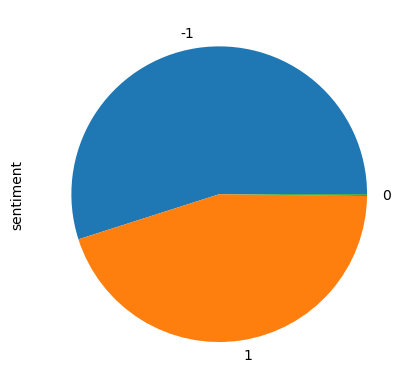

In [26]:
GI.sentiment.value_counts().plot.pie()

## Save

In [27]:
GI.to_csv(lex_dir+'gi.csv')

In [28]:
bing_pos_file = lex_dir + 'positive-words.txt'
bing_neg_file = lex_dir + 'negative-words.txt'
nrc_file = lex_dir + "NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"
syuzhet_file = lex_dir + "syuzhet.csv"
gi_file = lex_dir + "gi.csv"

# Import Bing lexicon

First, download RAR file from [here](http://sentiment.christopherpotts.net/lexicons.html#opinionlexicon).  Then open in a text editor and convert encoding and line endings in an editor.

In [29]:
bing_list = [(word.strip(), 'bing_positive', 1) 
             for word in open(bing_pos_file, 'r').readlines() 
             if re.match(r'^\w+$', word)]

In [30]:
bing_list += [(word.strip(), 'bing_negative', 1) 
              for word in open(bing_neg_file, 'r').readlines() 
              if re.match(r'^\w+$', word)]

In [31]:
bing = pd.DataFrame(bing_list, columns=['term_str', 'polarity', 'val'])
bing = bing.set_index(['term_str','polarity'])
bing = bing.unstack().fillna(0).astype('int')
bing.columns = bing.columns.droplevel(0)

In [32]:
bing.sum()

polarity
bing_negative    4658
bing_positive    1904
dtype: int64

## Create single sentiment column

In [33]:
bing['bing_sentiment'] = bing['bing_positive'] - bing['bing_negative']

In [34]:
bing.sample(10)

polarity,bing_negative,bing_positive,bing_sentiment
term_str,,,
cunts,1,0,-1
worrying,1,0,-1
lifesaver,0,1,1
remission,0,1,1
unsupported,1,0,-1
dishonest,1,0,-1
revoke,1,0,-1
retardedness,1,0,-1
valuable,0,1,1


# Import NRC lexicon

In [35]:
nrc = pd.read_csv(nrc_file, sep='\t', header=None)
nrc.columns = ['term_str','nrc_emotion','val']
nrc = nrc.set_index(['term_str','nrc_emotion'])
nrc = nrc.unstack()
nrc.columns = nrc.columns.droplevel(0)
nrc = nrc[nrc.sum(1) > 1]
nrc.columns = ['nrc_'+col for col in nrc.columns]

In [36]:
nrc.sum().sort_values(ascending=False)

nrc_negative        2366
nrc_fear            1368
nrc_positive        1281
nrc_anger           1208
nrc_sadness         1137
nrc_disgust         1004
nrc_trust            935
nrc_joy              686
nrc_anticipation     682
nrc_surprise         454
dtype: int64

In [37]:
nrc.head()

,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_negative,nrc_positive,nrc_sadness,nrc_surprise,nrc_trust
term_str,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0
abandoned,1,0,0,1,0,1,0,1,0,0
abandonment,1,0,0,1,0,1,0,1,1,0
abduction,0,0,0,1,0,1,0,1,1,0
aberration,0,0,1,0,0,1,0,0,0,0


In [38]:
nrc['nrc_sentiment'] =nrc.nrc_positive - nrc.nrc_negative

In [39]:
nrc['nrc_sentiment'].sample(10)

term_str
cheerfulness    1
hypocrite      -1
feud           -1
wan            -1
humiliating    -1
gallows        -1
lessen         -1
heartless      -1
distressed     -1
massacre       -1
Name: nrc_sentiment, dtype: int64

# Import Syuzhet lexicon

In [40]:
syu = pd.read_csv(syuzhet_file)
syu.columns = ['id','term_str','syu_sentiment']
syu = syu.drop('id', axis=1)
syu = syu.set_index('term_str')

In [41]:
syu.head()

,syu_sentiment
term_str,
abandon,-0.75
abandoned,-0.50
abandoner,-0.25
abandonment,-0.25
abandons,-1.00


# Import General Inquirer lexicon

This is prepared in a separate notebook.

In [42]:
gi = pd.read_csv(gi_file, index_col=['term_str'])
gi.columns = ['gi_sentiment']

In [43]:
gi.head()

,gi_sentiment
term_str,
abandon,-1
abandonment,-1
abate,-1
abdicate,-1
abhor,-1


# Combine all

In [44]:
combo = nrc.join(bing, how='outer')\
    .join(syu, how='outer')\
    .join(gi, how='outer')\
    .sort_index()

In [45]:
combo.head()

,nrc_anger,nrc_anticipation,nrc_disgust,nrc_fear,nrc_joy,nrc_negative,nrc_positive,nrc_sadness,nrc_surprise,nrc_trust,nrc_sentiment,bing_negative,bing_positive,bing_sentiment,syu_sentiment,gi_sentiment
term_str,,,,,,,,,,,,,,,,
abandon,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,NaN,NaN,NaN,-0.75,-1.0
abandoned,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,NaN,NaN,NaN,-0.50,NaN
abandoner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.25,NaN
abandonment,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-1.0,NaN,NaN,NaN,-0.25,-1.0
abandons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,NaN


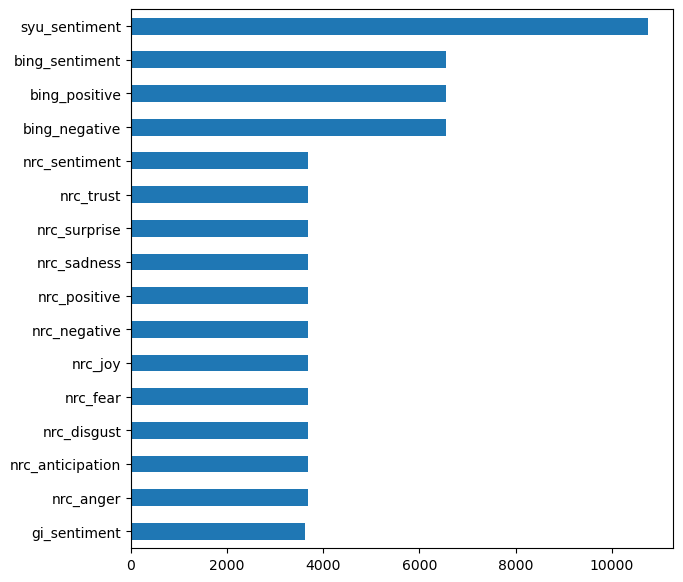

In [46]:
combo.count().sort_values().plot(kind='barh', figsize=(7,7));

# Save

In [47]:
nrc.to_csv(lex_dir + 'salex_nrc.csv')
bing.to_csv(lex_dir + 'salex_bing.csv')
syu.to_csv(lex_dir + 'salex_syuzhet.csv')
gi.to_csv(lex_dir + 'salex_gi.csv')
combo.to_csv(lex_dir + 'salex_combo.csv')        

In [48]:
salex_csv = lex_dir+'salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
# emo = 'polarity'
emo = 'sentiment'

In [49]:
sns.set()
# sns.set_style('whitegrid')

# Get Lexicon

In [50]:
salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]

In [51]:
salex

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


## Get lexicon columns

In [52]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

In [53]:
emo_cols 

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust',
 'sentiment']

# Get tracks

In [54]:
LIB = pd.read_csv(data_dir+'LIB_english.csv').set_index('track.id').sort_index()
LIB = LIB[['genre','top_genre','artist','song','language_name']]

In [55]:
TOKENS = pd.read_csv(data_dir+'F2_TOKENS_english.csv').set_index(OHCO).sort_index()
TOKENS = TOKENS.join(LIB)
TOKENS = TOKENS.reset_index().set_index(['artist']+OHCO)

In [56]:
LIB

,genre,top_genre,artist,song,language_name
track.id,,,,,
00Mb3DuaIH1kjrwOku9CGU,"['canadian pop', 'candy pop', 'dance pop', 'po...",canadian pop,Avril Lavigne,Sk8er Boi,English
017PF4Q3l4DBUiWoXk4OWT,"['dance pop', 'pop', 'uk pop']",dance pop,Dua Lipa,Break My Heart,English
01JszWYuKqRjddPQ4creVF,"['hard rock', 'metal', 'old school thrash', 'r...",hard rock,Metallica,Hardwired,English
01oPNCtTniFT3YM4K3ksTf,"['indie pop rap', 'philly rap', 'pop rap']",indie pop rap,Chiddy Bang,Opposite of Adults,English
01pOtDU5YHWbxuNBzlRUem,"['alternative metal', 'modern rock', 'nu metal...",alternative metal,Linkin Park,Waiting for the End,English
...,...,...,...,...,...
7xuhVUJmBpHR276Yc7AsgW,"['alternative metal', 'canadian pop punk', 'ca...",alternative metal,Sum 41,Walking Disaster,English
7yBEKiv1LmO7GM4rOejhcW,[],NaN,ThxSoMch,SPIT IN MY FACE!,English
7yoBjKO6cCnK3zV8gr1k4e,"['modern alternative rock', 'modern rock', 'po...",modern alternative rock,Highly Suspect,Lydia,English


In [57]:
TOKENS

pos_tuple  \
artist        track.id               section_num line_num token_num                        
Avril Lavigne 00Mb3DuaIH1kjrwOku9CGU 1           1        0                ('He', 'PRP')   
                                                          1               ('was', 'VBD')   
                                                          2                  ('a', 'DT')   
                                                          3                ('boy', 'NN')   
                                                          4               ('she', 'PRP')   
...                                                                                  ...   
Metallica     7zb1n2Rdmh5arJ3WOp2Z5c 2           4        4                 ('of', 'IN')   
                                                          5          ('salvation', 'NN')   
                                                          6               ('take', 'VB')   
                                                          7                ('me', 'PRP')   
                                                          8               ('home', 'NN')   

                                                                     pos  \
artist        track.id               section_num line_num token_num        
Avril Lavigne 00Mb3DuaIH1kjrwOku9CGU 1           1        0          PRP   
                                                          1          VBD   
                                                          2           DT   
                                                          3           NN   
                                                          4          PRP   
...                                                                  ...   
Metallica     7zb1n2Rdmh5arJ3WOp2Z5c 2           4        4           IN   
                                                          5           NN   
                                                          6           VB   
                                                          7          PRP   
                                                          8           NN   

                                                                     token_str  \
artist        track.id               section_num line_num token_num              
Avril Lavigne 00Mb3DuaIH1kjrwOku9CGU 1           1        0                 He   
                                                          1                was   
                                                          2                  a   
                                                          3                boy   
                                                          4                she   
...                                                                        ...   
Metallica     7zb1n2Rdmh5arJ3WOp2Z5c 2           4        4                 of   
                                                          5          salvation   
                                                          6               take   
                                                          7                 me   
                                                          8               home   

                                                                      term_str  \
artist        track.id               section_num line_num token_num              
Avril Lavigne 00Mb3DuaIH1kjrwOku9CGU 1           1        0                 he   
                                                          1                was   
                                                          2                  a   
                                                          3                boy   
                                                          4                she   
...                                                                        ...   
Metallica     7zb1n2Rdmh5arJ3WOp2Z5c 2           4        4                 of   
                                                          5          salvation   
      

In [58]:
TOKENS = TOKENS.join(salex, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [59]:
TOKENS[salex.columns].sample(10)

,,,,,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
artist,track.id,section_num,line_num,token_num,,,,,,,,,,,
Black Sabbath,3IOQZRcEkplCXg6LofKqE9,97,0,210,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0
Boys Like Girls,1AnesEZjtNHT7Nr2Y4BuNR,0,286,44,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
Various Artists,6kEpsSIfENnY18Dg81Vmc1,1,1075,5,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
Ramones,0rD8ArOZW4N8usAKK3OMyr,0,917,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
Led Zeppelin,4OMu5a8sFpcRCPCcsoEaov,0,4253,5,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
Frank Sinatra,4hHbeIIKO5Y5uLyIEbY9Gn,0,676,2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
Metallica,4q9QVIaLqjbcoqeCfM2zan,0,29,11,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
Iron Maiden,4pvljOTffL98X3b9x86HRu,14,182,3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0
Megadeth,5a2hIQWInPjqkkFiUEgxoX,0,389,290,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [60]:
TOKENS[['term_str'] + emo_cols].sample(10)

term_str  \
artist          track.id               section_num line_num token_num               
KONGOS          2kWowW0k4oFymhkr7LmvzO 3           1        0                whoa   
Metallica       4q9QVIaLqjbcoqeCfM2zan 0           181      152               had   
                                                   316      388              kept   
                4OH1lqC4mx1ja8RkXMOmRp 4           352      39                 to   
                3eaOnliKh0QdjuDbPAwCLx 0           5        20                has   
Milky Chance    5tjrH5xrpkgKgYd8zQgU8X 3           8        4                feel   
Pantera         4ifte2dOwkkfP7suPYmwX2 5           21       65         production   
Black Sabbath   5clz8BOBulxx7q2yHxqOCk 2           18       6                  in   
Taylor Swift    1msEuwSBneBKpVCZQcFTsU 7           2        10                 oh   
Boys Like Girls 1AnesEZjtNHT7Nr2Y4BuNR 0           206      92              would   

                                                                       anger  \
artist          track.id               section_num line_num token_num          
KONGOS          2kWowW0k4oFymhkr7LmvzO 3           1        0            0.0   
Metallica       4q9QVIaLqjbcoqeCfM2zan 0           181      152          0.0   
                                                   316      388          0.0   
                4OH1lqC4mx1ja8RkXMOmRp 4           352      39           0.0   
                3eaOnliKh0QdjuDbPAwCLx 0           5        20           0.0   
Milky Chance    5tjrH5xrpkgKgYd8zQgU8X 3           8        4            0.0   
Pantera         4ifte2dOwkkfP7suPYmwX2 5           21       65           0.0   
Black Sabbath   5clz8BOBulxx7q2yHxqOCk 2           18       6            0.0   
Taylor Swift    1msEuwSBneBKpVCZQcFTsU 7           2        10           0.0   
Boys Like Girls 1AnesEZjtNHT7Nr2Y4BuNR 0           206      92           0.0   

                                                                       anticipation  \
artist          track.id               section_num line_num token_num                 
KONGOS          2kWowW0k4oFymhkr7LmvzO 3           1        0                   0.0   
Metallica       4q9QVIaLqjbcoqeCfM2zan 0           181      152                 0.0   
                                                   316      388                 0.0   
                4OH1lqC4mx1ja8RkXMOmRp 4           352      39                  0.0   
                3eaOnliKh0QdjuDbPAwCLx 0           5        20                  0.0   
Milky Chance    5tjrH5xrpkgKgYd8zQgU8X 3           8        4                   0.0   
Pantera         4ifte2dOwkkfP7suPYmwX2 5           21       65                  1.0   
Black Sabbath   5clz8BOBulxx7q2yHxqOCk 2           18       6                   0.0   
Taylor Swift    1msEuwSBneBKpVCZQcFTsU 7           2        10                  0.0   
Boys Like Girls 1AnesEZjtNHT7Nr2Y4BuNR 0           206      92                  0.0   

                                                                       disgust  \
artist          track.id               section_num line_num token_num            
KONGOS          2kWowW0k4oFymhkr7LmvzO 3           1        0              0.0   
Metallica       4q9QVIaLqjbcoqeCfM2zan 0           181      152            0.0   
                                                   316      388            0.0   
                4OH1lqC4mx1ja8RkXMOmRp 4           352      39             0.0   
                3eaOnliKh0QdjuDbPAwCLx 0           5        20             0.0   
Milky Chance    5tjrH5xrpkgKgYd8zQgU8X 3           8        4              0.0   
Pantera         4ifte2dOwkkfP7suPYmwX2 5           21       65             0.0   
Black Sabbath   5clz8BOBulxx7q2yHxqOCk 2           18       6              0.0   
Taylor Swift    1msEuwSBneBKpVCZQcFTsU 7           2        10             0.0   
Boys Like Girls 1AnesEZjtNHT7Nr2Y4BuNR 0           206      92             0.0   

                                                             

In [61]:
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [62]:
TOKENS.head()

pos_tuple  \
artist        track.id               section_num line_num token_num                   
Avril Lavigne 00Mb3DuaIH1kjrwOku9CGU 1           1        0           ('He', 'PRP')   
                                                          1          ('was', 'VBD')   
                                                          2             ('a', 'DT')   
                                                          3           ('boy', 'NN')   
                                                          4          ('she', 'PRP')   

                                                                     pos  \
artist        track.id               section_num line_num token_num        
Avril Lavigne 00Mb3DuaIH1kjrwOku9CGU 1           1        0          PRP   
                                                          1          VBD   
                                                          2           DT   
                                                          3           NN   
                                                          4          PRP   

                                                                    token_str  \
artist        track.id               section_num line_num token_num             
Avril Lavigne 00Mb3DuaIH1kjrwOku9CGU 1           1        0                He   
                                                          1               was   
                                                          2                 a   
                                                          3               boy   
                                                          4               she   

                                                                    term_str  \
artist        track.id               section_num line_num token_num            
Avril Lavigne 00Mb3DuaIH1kjrwOku9CGU 1           1        0               he   
                                                          1              was   
                                                          2                a   
                                                          3              boy   
                                                          4              she   

                                                                                                                 genre  \
artist        track.id               section_num line_num token_num                                                      
Avril Lavigne 00Mb3DuaIH1kjrwOku9CGU 1           1        0          ['canadian pop', 'candy pop', 'dance pop', 'po...   
                                                          1          ['canadian pop', 'candy pop', 'dance pop', 'po...   
                                                          2          ['canadian pop', 'candy pop', 'dance pop', 'po...   
                                                          3          ['canadian pop', 'candy pop', 'dance pop', 'po...   
                                                          4          ['canadian pop', 'candy pop', 'dance pop', 'po...   

                                                                        top_genre  \
artist        track.id               section_num line_num token_num                 
Avril Lavigne 00Mb3DuaIH1kjrwOku9CGU 1           1        0          canadian pop   
                                                          1          canadian pop   
                                                          2          canadian pop   
                                                          3          canadian pop   
                                                          4          canadian pop   

                                                                          song  \
artist        track.id               section_num line_num token_num              
Avril Lavigne 00Mb3DuaIH1kjrwOku9CGU 1           1        0          Sk8er Boi   
                                                          1          Sk8er Boi   
                       

In [63]:
metallica = TOKENS.sort_index().loc[('Metallica')].copy()
blink = TOKENS.sort_index().loc[('blink-182')].copy()
tswifty = TOKENS.sort_index().loc[('Taylor Swift')].copy()

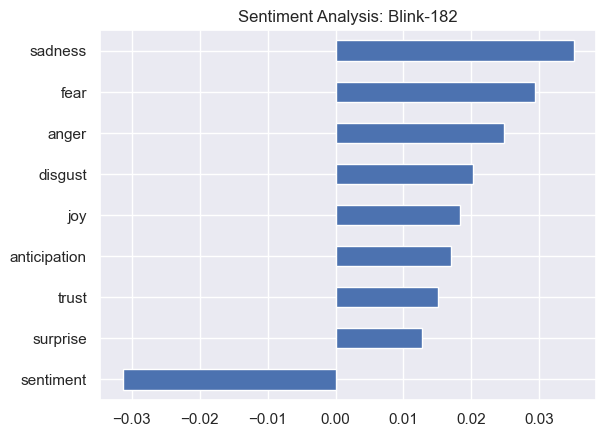

In [64]:
ax = blink[emo_cols].mean().sort_values().plot.barh()
ax.set_title("Sentiment Analysis: Blink-182")
ax.figure.savefig(vis_dir+"7.1.png",bbox_inches='tight',pad_inches=0.1)

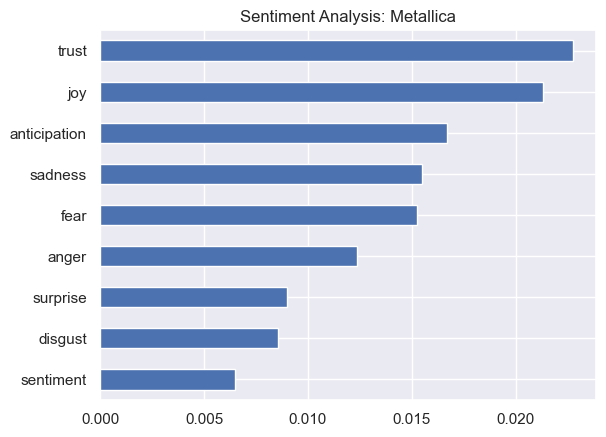

In [65]:
ax = metallica[emo_cols].mean().sort_values().plot.barh()
ax.set_title("Sentiment Analysis: Metallica")
ax.figure.savefig(vis_dir+"7.2.png",bbox_inches='tight',pad_inches=0.1)

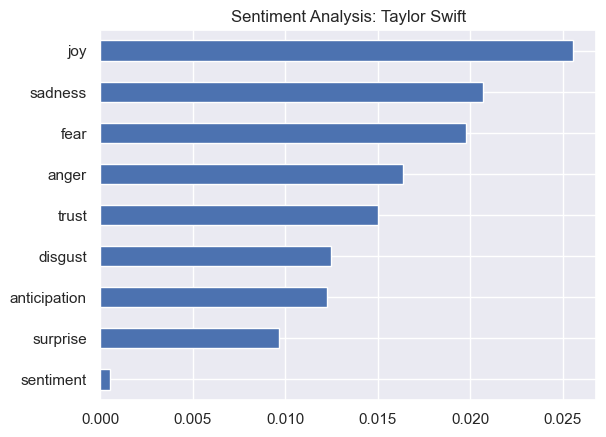

In [66]:
ax = tswifty[emo_cols].mean().sort_values().plot.barh()
ax.set_title("Sentiment Analysis: Taylor Swift")
ax.figure.savefig(vis_dir+"7.3.png",bbox_inches='tight',pad_inches=0.1)

# Explore Sentiment in Texts

In [67]:
blink

pos_tuple  pos  \
track.id               section_num line_num token_num                           
08aMpsxjozNNQPVnnE1QaC 0           0        0             ('Verse', '$')    $   
                                            1                ('1', 'CD')   CD   
                                            2            ('Matt', 'NNP')  NNP   
                                            3           ('Skiba', 'NNP')  NNP   
                                   1        0            ('Mark', 'NNP')  NNP   
...                                                                  ...  ...   
7ukNySRsyzfFuVO9RKwJD7 0           50       0             ('This', 'DT')   DT   
                                            1              ('is', 'VBZ')  VBZ   
                                            2           ('where', 'WRB')  WRB   
                                            3               ('I', 'PRP')  PRP   
                                            4          ('belong', 'VBP')  VBP   

                                                      token_str term_str  \
track.id               section_num line_num token_num                      
08aMpsxjozNNQPVnnE1QaC 0           0        0             Verse    verse   
                                            1                 1        1   
                                            2              Matt     matt   
                                            3             Skiba    skiba   
                                   1        0              Mark     mark   
...                                                         ...      ...   
7ukNySRsyzfFuVO9RKwJD7 0           50       0              This     this   
                                            1                is       is   
                                            2             where    where   
                                            3                 I        i   
                                            4            belong   belong   

                                                                                                   genre  \
track.id               section_num line_num token_num                                                      
08aMpsxjozNNQPVnnE1QaC 0           0        0          ['alternative metal', 'modern rock', 'pop punk...   
                                            1          ['alternative metal', 'modern rock', 'pop punk...   
                                            2          ['alternative metal', 'modern rock', 'pop punk...   
                                            3          ['alternative metal', 'modern rock', 'pop punk...   
                                   1        0          ['alternative metal', 'modern rock', 'pop punk...   
...                                                                                                  ...   
7ukNySRsyzfFuVO9RKwJD7 0           50       0          ['alternative metal', 'modern rock', 'pop punk...   
                                            1          ['alternative metal', 'modern rock', 'pop punk...   
                                            2          ['alternative metal', 'modern rock', 'pop punk...   
                                            3          ['alternative metal', 'modern rock', 'pop punk...   
                                            4          ['alternative metal', 'modern rock', 'pop punk...   

                                                               top_genre  \
track.id               section_num line_num token_num                      
08aMpsxjozNNQPVnnE1QaC 0           0        0          alternative metal   
                                            1          alternative metal   
                                            2          alternative metal   
                                            3          alternative metal   
                                   1        0          alternative metal   
...                                                                  ...   
7ukNySR

In [68]:
blink['html'] =  blink.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)
metallica['html'] =  metallica.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)
tswifty['html'] = tswifty.apply(lambda x: "<span class='sent{}'>{}</span>".format(int(np.sign(x[emo])), x.term_str), 1)

In [69]:
tswifty['html'].sample(10)

track.id                section_num  line_num  token_num
7qEUFOVcxRI19tbT68JcYK  1            20        4                    <span class='sent0'>it</span>
3CeCwYWvdfXbZLXFhBrbnf  9            5         5                  <span class='sent0'>have</span>
6d9IiDcFxtFVIvt9pCqyGH  5            4         1            <span class='sent0'>captivated</span>
4t0OI7XrODjSkAu3bTPmWj  5            4         4                <span class='sent0'>bigger</span>
10eBRyImhfqVvkiVEGf0N0  8            6         5              <span class='sent0'>somebody</span>
1qrpoAMXodY6895hGKoUpA  8            8         2                   <span class='sent0'>too</span>
                        4            3         9                  <span class='sent1'>love</span>
0z9UVN8VBHJ9HdfYsOuuNf  0            1284      2                 <span class='sent0'>songs</span>
0Jlcvv8IykzHaSmj49uNW8  6            4         0                    <span class='sent0'>it</span>
0z9UVN8VBHJ9HdfYsOuuNf  0            951       1             

In [70]:
tswifty_sections = tswifty.groupby(SECTION)[emo_cols].mean()
metallica_sections = metallica.groupby(SECTION)[emo_cols].mean()
blink_sections = blink.groupby(SECTION)[emo_cols].mean()

In [71]:
tswifty_sections['sent_str'] = tswifty.groupby(SECTION).term_str.apply(lambda x: x.str.cat(sep=' '))
tswifty_sections['html_str'] = tswifty.groupby(SECTION).html.apply(lambda x: x.str.cat(sep=' '))

In [72]:
metallica_sections['sent_str'] = metallica.groupby(SECTION).term_str.apply(lambda x: x.str.cat(sep=' '))
metallica_sections['html_str'] = metallica.groupby(SECTION).html.apply(lambda x: x.str.cat(sep=' '))

In [73]:
blink_sections['sent_str'] = blink.groupby(SECTION).term_str.apply(lambda x: x.str.cat(sep=' '))
blink_sections['html_str'] = blink.groupby(SECTION).html.apply(lambda x: x.str.cat(sep=' '))

In [74]:
def sample_sections(df):
    rows = []
    for idx in df.sample(10).index:

        valence = round(df.loc[idx, emo], 4)     
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z=0
        rows.append("""<tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
        <td>{1}</td><td>{3}</td><td width="400" style="text-align:left;">{2}</td>
        </tr>""".format(color, valence, df.loc[idx, 'html_str'], idx))

    display(HTML('<style>#sample1 td{font-size:120%;vertical-align:top;} .sent-1{color:red;font-weight:bold;} .sent1{color:green;font-weight:bold;}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentiment</th><th>ID</th><th width="600">Sentence</th></tr>'+''.join(rows)+'</table>'))

In [75]:
sample_sections(tswifty_sections)

Sentiment,ID,Sentence
0.0357,"('550erGcdD9n6PnwxrvYqZT', 8)",and i got tired of waiting wondering if you were ever coming around my faith in you was fading when i met you on the outskirts of town
0.0,"('0tQ9vBYpldCuikPsbgOVKA', 8)",in the middle of the night when im in this dream its like a million little stars spelling out your name you got to come on come on say that well be together come on come on oh ohoh in the middle of the night when im in this dream its like a million little stars spelling out your name you got to come on come on say that well be together come on come on come on in the middle of the night waking from this dream i want to feel you by my side standing next to me you got to come on come on say that well be together come on come on little taste of heaven oh ohohoh ohohoh oh
-0.0513,"('1x0J8LFX23d5h1zzuzZorc', 6)",stay and ill be loving you for quite some time no one else is gon na love me when i get mad mad mad so i think that its best if we both stay stay stay stay stay stay
0.0441,"('15DeqWWQB4dcEWzJg15VrN', 2)",our song is the slamming screen door sneakin out late tapping on your window when were on the phone and you talk real slow cause its late and your mama dont know our song is the way you laugh the first date man i didnt kiss her and i should have and when i got home fore i said amen askin god if he could play it again
-0.11,"('3RBluWmSoG2pGA1OePzGJI', 10)",now im standing alone in a crowded room and were not speaking and im dying to know is it killing you like its killing me yeah i dont know what to say since the twist of fate when it all broke down the story of us looks a lot like a tragedy now now now and were not speaking and im dying to know is it killing you like its killing me yeah i dont know what to say since the twist of fate cause were goin down and the story of us looks a lot like a tragedy now
0.04,"('0dBW6ZsW8skfvoRfgeerBF', 6)",but we got bills to pay we got nothing figured out when it was hard to take yes yes this is what i thought about
0.0769,"('2yLa0QULdQr0qAIvVwN6B5', 7)",baby let the games begin let the games begin let the games begin baby let the games begin let the games begin let the games begin
-0.0588,"('0dBW6ZsW8skfvoRfgeerBF', 9)",and i remember that fight 230am as everything was slipping right out of our hands i ran out crying and you followed me out into the street braced myself for the goodbye cause thats all ive ever known then you took me by surprise you said ill never leave you alone
-0.02,"('3bIxTsfeNMO7Nt2J3EUKrA', 7)",it feels like one of those nights we ditch the whole scene it feels like one of those nights we wont be sleepin it feels like one of those nights you look like bad news i got ta have you i got ta have you you woah ooh yeah ehyeah
0.0,"('5YqltLsjdqFtvqE7Nrysvs', 10)",we are never ever ever getting back together we are never ever ever ooh getting back together you go talk to your friends talk to my friends talk to me but we are never ever ever ever getting back together


In [76]:
sample_sections(blink_sections)

Sentiment,ID,Sentence
0.0,"('44TuSOP6xIAEeJmZsN3nXO', 9)",whoa oh oh oh whoa oh oh oh whoa oh oh oh whoa oh oh oh life is too short to last long whoa oh oh oh whoa oh oh oh
0.0,"('6slwIWGDvqTUnRZinRxij9', 2)",dont like hesh dont like rap kicked old sally cause shes fat im a jerk im a punk took a shower cause i stunk smoked a bong killed a cat had my nuts attacked by rats dad got nude i wore a thong for a hobby i make bombs
0.0,"('3OaLn7AY8g4J10EMgxazGh', 8)",the only time i feel alive is when i find something i would die for the last train home the only time i feel alive is when i find something i would die for the last train home
-0.125,"('3OaLn7AY8g4J10EMgxazGh', 7)",ill take the last train home the last train home ill take the last train home the last train home ill take the last train home ill take the last train home
-0.0303,"('5F48HH6pGR5FKoaLQGla2d', 3)",because i fell in love with the girl at the rock show she said what and i told her that i didnt know shes so cool gon na sneak in through her window
0.0,"('24CRDgNOgA72JLL7PHFjgB', 1)",everything has fallen to pieces earth is dying help me jesus we need guidance weve been misled young and hostile but not stupid
-0.0526,"('6WywCKcFLVLNQLa68d6gMR', 5)",this bed on fire i cant sleep here no more too late and tired dreaming down on the floor
0.0,"('5iF6PGpLN8IgEemesMzI4D', 8)",na na na na na na na na na na na na na na na na they dont care they dont care about you na na na na na na na na na na na na na na na na they dont care they dont care about you
0.0,"('503xVIOMfUp542pdZgHACb', 6)",fuck this place lets put up a parking lot
-0.0789,"('5SlKhaPcdIfSjpoM2QtM4C', 2)",but id play with fire to break the ice and id play with a nuclear device is it something ill regret or do i want what i cant get i wish it didnt have to be so bad


In [77]:
sample_sections(metallica_sections)